# 내용

## 10 - 01 Sigmoid보다 Relu를 쓰자
앞서 살펴 보았던 **XOR**문제를 해결하기 위해서는 레이어를 딥하게 만드는 NN을 쓰기로 했다.

하지만 위의 문제는 딥하게 하더라도 성능이 그다지 좋아지지 않는 문제가 있었음. - Poor Result

히든레이어가 많아질 수록 더욱 정확해지지 않을까? -> 뭔솔 아님

그 이유는 **Backpropagation**에 있음. 

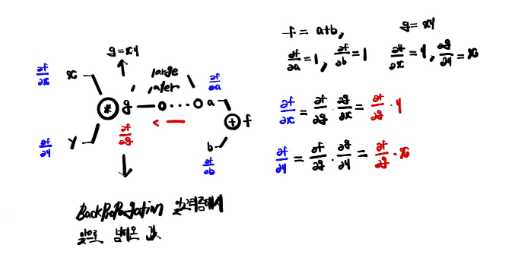

만약 Y가 sigmoid값을 가진다면 0~1사이의 값을 가짐. 이를 계속 미분하며 역전파를 하다보면

0.01 * 0.03~~~ 매우 적은 값을 가지게 됨. 이때 노드를 미분한 값은 노드가 결과에 미치는 영향을 의미하기에 

노드가 멀어지면 멀어질 수록 결과에 영향을 작게 미침(0에 점점 수렴하기에) 


이러한 현상을 **Vanishing gradient**라고 한다. 
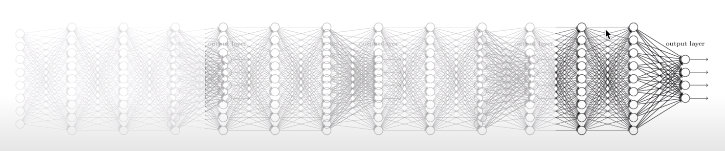
" Vanishing gradient는 뉴럴 네트워크에서 Backpropagation으로 학습하는 도중 활성화 함수를 sigmoid로 설정해 0과 1 사이의 값이 지속적으로 곱해지는 이유로 Gradient 항이 사실상 사라져 학습망이 깊어질수록 이전의 노드들이 결과에 미치는 영향이 급격히 줄어드는 상황을 말합니다. "

이러한 상황은 활성화 함수를 Sigmoid로 설정했기 때문 -> ReLU(Rectified Linear Unit)의 등장!

ReLU의 핵심은 0보다 작은 경우는 0을 반환하고 0보다 큰 경우에는 값을 그대로 갖는다.
따라서 최댓값이 1보다 큰 값도 가능하기 때문에 Vanishing gradient를 방지하고 학습이 빠릅니다.

이 외에도 ReLU 함수 외에도 Tanh, Leaky ReLU, PReLU, Maxout 등의 Activate Fucd이 있다.

짧게 짚고 넘어가면 Tanh은 sigmoid의 중심을 0으로 맞추어 최솟값과 최댓값의 범위를 -1에서 1 사이로 변경한 것이며 Leaky ReLU는 0보다 작은 값이 0이 아닌 0 0보다 작은 값, 단 적당히 작은 값을 갖도록 ReLU = max(0, x)에서 Leaky ReLU = max(0.1x, x)의 형태로 바꾼 것입니다.


## 10 -02 Weight 초기화 잘해보자

Hinton 교수는 기존의 방법으로 학습이 잘 되지 않는 이유를 Weight 초기화의 방법이 옳지 않아서라고 함.

그렇다면 Weight를 적절한 방법으로 초기화하지 않았을 떄 생기는 문제는 무엇일까.

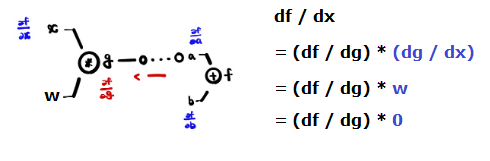

모형을 살펴보면 g = wx일 때 x가 f에 미치는 영향을 알기 위해 ∂f / ∂x를 chain rule에 따라 미분했을 때 ∂g / ∂x = w가 0으로 초기화되어있기 때문에 0의 값을 갖습니다.

따라서 x값에 상관없이 ∂f / ∂x = 0으로 x 그리고 x 이전의 레이어들이 f에 미치는 영향(미분 값)이 모두 0이 됩니다. 따라서 w를 0으로 초기화했을 때는 Vanishing gradient 현상을 피할 수 없습니다. 

### Restricted Boltzman Machine(RBM)

 2006년 Hinton 교수님의 논문 " A Fast Learning Algorithm Deep Belief Nets - Restricted Boltzmann Machine(RBM)"에서 제시된 방법. 이 방법으로 초기화한 네트워크를 Deep Belief Nets(DBN)
 
꼭 알아두는 편이 신상에 좋다. 

입력값을 재구성하여 데이터의 고유 패턴을 자동으로 감지할 수 있게 만든 것 

뭔가 어렵다. 이건 블로그 글 참조 

https://angeloyeo.github.io/2020/10/02/RBM.html

## 10-03 Dropout과 앙상블 

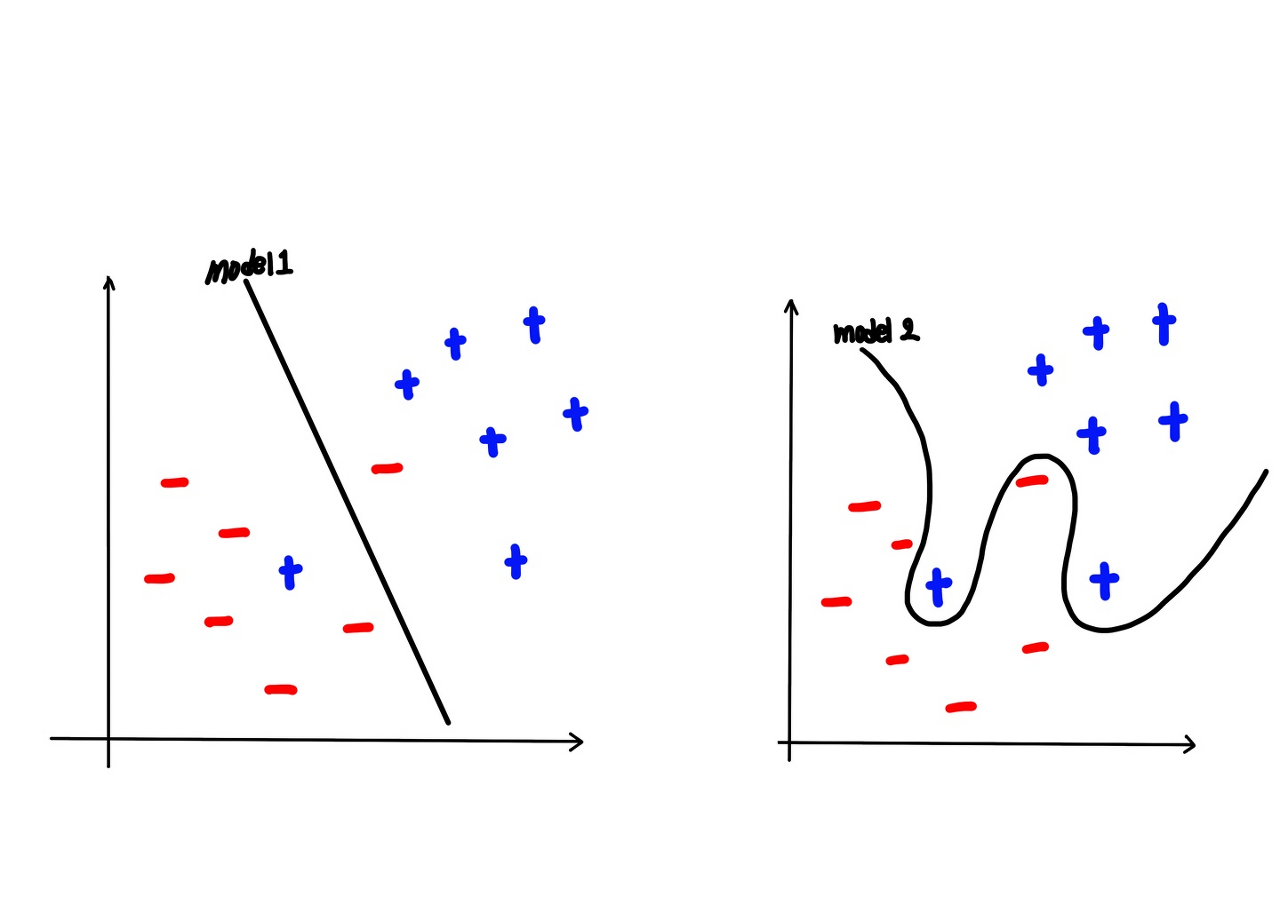
Overfitting이란 Training dataset에만 너무 딱 들어맞아 전체 dataset의 측면에서 봤을 때는 적합하지 않은 모델

이를 피하기 위한 방법은 어떤 것이 있을까?
1. Training data를 늘린다.
2. Feature수를 줄인다.
3. 정규화


**Dropout**
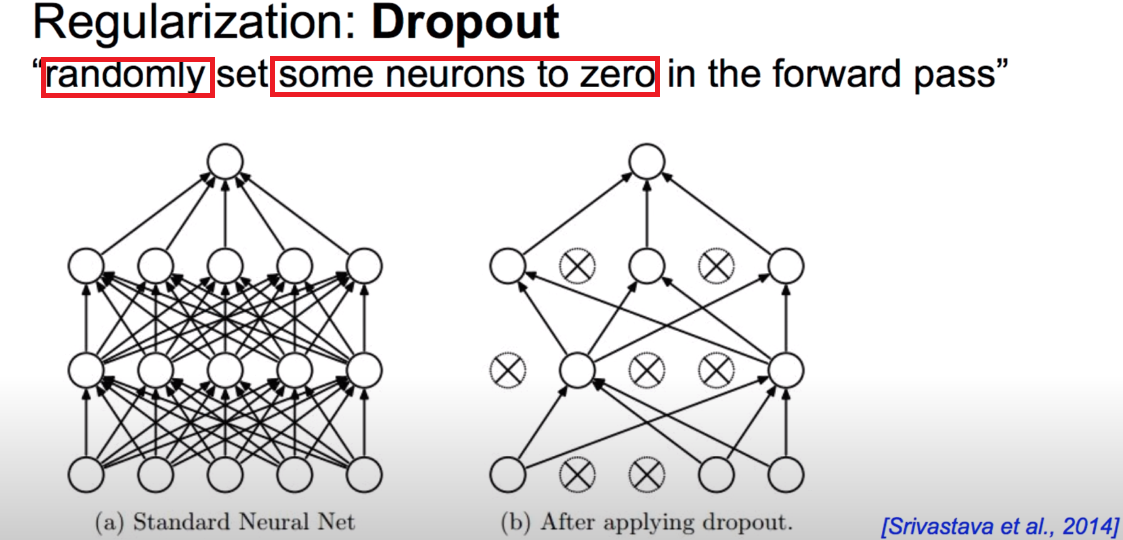
Dropout은 전체 weight으로 학습하는 것이 아니라, 임의로 몇몇의 weight을 0으로 만들어(반영하지 않고) weight 중 일부만으로 학습하는 방법.

standard neural network(좌)에서는 레이어의 모든 노드들끼리 이어져있는 모습을 볼 수 있다. 
일반적인 경우로 모든 weight에 대해 학습하고 있다. 하지만 오른쪽의 Dropout모델을 보면 레이어의 몇몇 뉴런들은 학습에 관여하지 않는데, 이는 해당 뉴런의 weight을 잠시 0으로 만들었기 때문

헷갈리면 안 되는 것은 학습 시에만 임의의 뉴런의 weight을 0으로 두고 학습하였을 뿐 임의로 선택하기 때문에 다음 학습 시에는 다른 뉴런의 weight이 0이 될 수 있다. 따라서 선택된 뉴런들의 weight을 0으로 만드는 것이 아니라 weight을 0으로 가정하고 학습한다는 것을 인지해야 함.


**Ensemble** 

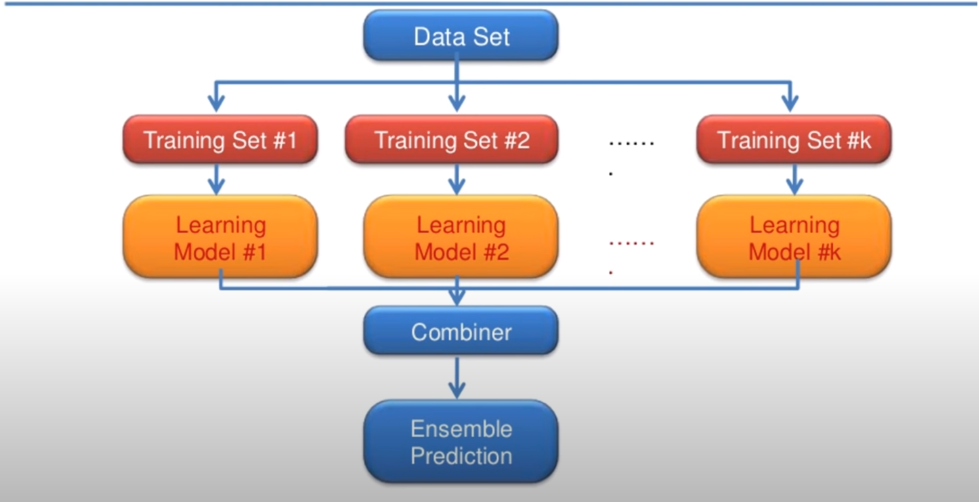
다수의 독립적인 학습 모델(Learning model)을 만들어 따로따로 학습한 뒤 모델들을 모두 합쳐 한 번의 예측을 만드는 것.

 실제로 Ensemble 방법을 이용하여 학습할 시 2 - 5%의 수준으로 예측률이 올라간다는 연구 결과가 있다.


### 10 - 04 레고처럼 네트워크 모듈을 마음껏 쌓아보자

Fast Foward 
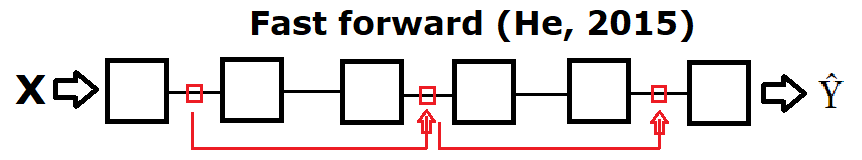
weight를 초기화하는 방법 중 Xavier_init를 개선한 He's_init를 만든 He가 고안해낸 뉴럴 네트워크로, 앞쪽으로 이동할 때 하나의 레이어가 아닌 2개의 레이어 혹은 여러 개의 레이어씩 이동하는 방법으로 직전 포스트에서 배운 Dropout처럼 난수를 사용하여 다양한 결과를 통합하는 듯한 느낌

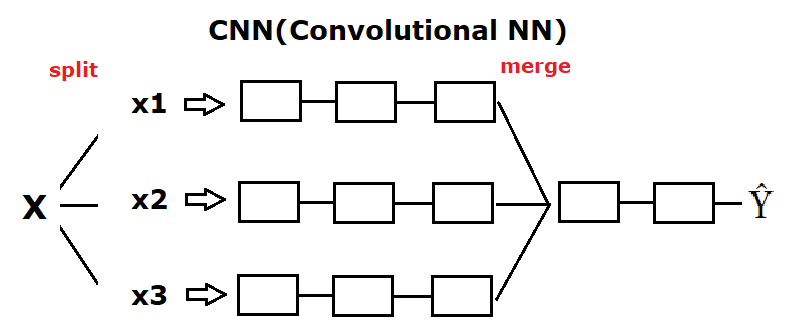
CNN(Convolutional Neural Network, 합성곱 신경망)은 주로 이미지 인식에 사용되는 딥 뉴럴 네트워크입니다. 고양이가 보는 것마다 자극 받는 뇌의 위치가 다른 것을 보고 이에 아이디어를 얻은 것으로, 전체를 한번에 보는 것이 아니라 부분을 보아 (split) 합치는(merge) 구조

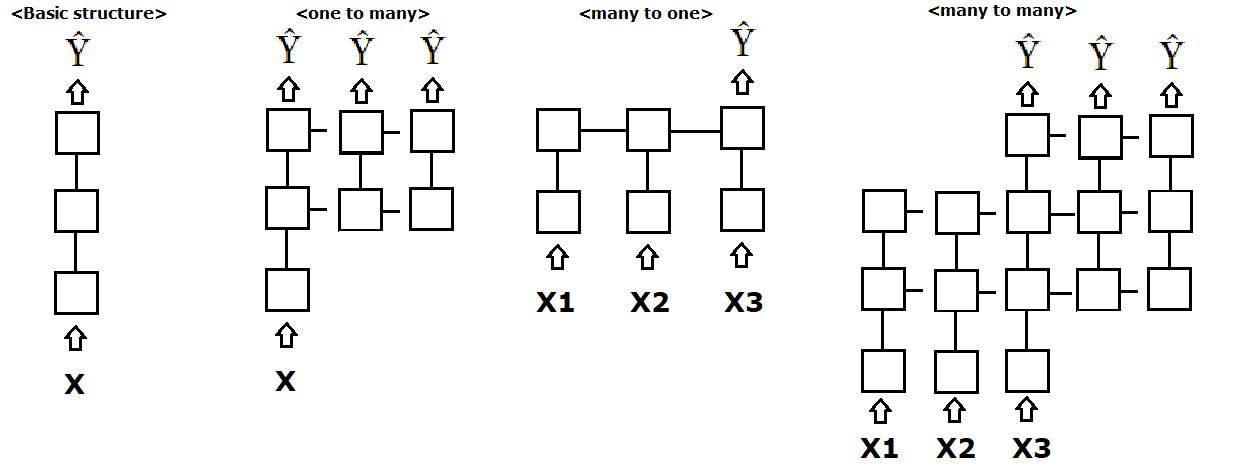
 RNN(Recurrent Neural Network, 순환 신경망)입니다. RNN은 음성, 문자 등 순차적으로 등장하는 데이터 처리에 적합한 모델로 한 방향으로 진행하는 네트워크를 옆으로 진행해 순환구조를 이루고 있습니다

# MNIST 실습 다양하게 -

https://github.com/hunkim/DeepLearningZeroToAll 

깃헙 참조

In [6]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()



In [7]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

learning_rate = 0.001
training_epochs = 15
batch_size = 100

# weights & bias for nn layers
W1 = tf.Variable(tf.random_normal([784, 256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([256, 256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.Variable(tf.random_normal([256, 10]))
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

ModuleNotFoundError: No module named 'tensorflow.examples'